# LSTM

In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout, Flatten
import keras.regularizers
import pandas as pd
import matplotlib as mp
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from sklearn.model_selection import train_test_split
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.tools import diff
import math
from sklearn.metrics import mean_squared_error
from keras.optimizers import Adam, SGD
from keras.callbacks import ReduceLROnPlateau
import keras_tuner as kt

In [2]:
df = pd.read_csv('Singapore Electricity Generation.csv')
df = df.drop(columns=['Data Series'])
df = df.T
df.index.name = 'Date'
df.columns = ['Electricity Generation']
df.index = pd.to_datetime(df.index)
df = df.sort_index(ascending=True)
df

,Electricity Generation
Date,
1975-01-01,341.8
1975-02-01,289.6
1975-03-01,342.8
1975-04-01,348.6
1975-05-01,351.4
...,...
2022-01-01,4780.2
2022-02-01,4287.3
2022-03-01,4886.1


In [3]:
df.isnull().sum()

Electricity Generation    0
dtype: int64

In [4]:
train_data = df[:400]
test_data = df[400:]

In [5]:
scaler = MinMaxScaler(feature_range=(0, 1))

train_data = scaler.fit_transform(train_data)
test_data = scaler.fit_transform(test_data)

In [6]:
print('train_data shape: ' + str(train_data.shape))
print('test_data shape: ' + str(test_data.shape))

train_data shape: (400, 1)
test_data shape: (169, 1)


In [7]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []

    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    
    return np.array(dataX), np.array(dataY)

In [8]:
look_back = 3
trainX, trainY = create_dataset(train_data, look_back)
testX, testY = create_dataset(test_data, look_back)

In [9]:
print("Shape of train input: " + str(trainX.shape))
print("Shape of train labels: " + str(trainY.shape))
print("Shape of test input: " + str(testX.shape))
print("Shape of test labels: " + str(testY.shape))

Shape of train input: (396, 3)
Shape of train labels: (396,)
Shape of test input: (165, 3)
Shape of test labels: (165,)


In [10]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [11]:
print("Shape of train input: " + str(trainX.shape))
print("Shape of train labels: " + str(trainY.shape))
print("Shape of test input: " + str(testX.shape))
print("Shape of test labels: " + str(testY.shape))

Shape of train input: (396, 1, 3)
Shape of train labels: (396,)
Shape of test input: (165, 1, 3)
Shape of test labels: (165,)


In [12]:
# model = Sequential()

# model.add(LSTM(32, input_shape=(1, look_back)))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(1, activation='softmax'))

# adam = Adam(learning_rate=0.01)
# model.compile(optimizer=adam, loss='mean_squared_error')

In [13]:
# l2 = keras.regularizers.L2(0.05)

# model = Sequential()

# model.add(LSTM(32, input_shape=(1, look_back), return_sequences=True))
# model.add(LSTM(64, return_sequences=True))

# model.add(Flatten())

# model.add(Dense(64, activation='relu', kernel_regularizer=l2))
# model.add(Dense(32, activation='relu', kernel_regularizer=l2))

# model.add(Dense(1, activation='relu'))

# adam = Adam(learning_rate=0.01)
# sgd = SGD()
# model.compile(optimizer=adam, loss='mean_squared_error')

In [14]:
print('''activation: relu
kernel regularizer: l2
dropout rate: 0.1
optimizer: adam''')

activation: relu
kernel regularizer: l2
dropout rate: 0.1
optimizer: adam


In [15]:
## HYPERPARAMETER TUNING

# def build_model(hp):

#     hp_kr = hp.Choice('kernel_regularizer', values=['l1', 'l2'])
#     hp_rate = hp.Choice('rate', values=[0.2, 0.3, 0.4])
#     hp_opt = hp.Choice('optimizer', values=['adam', 'sgd', 'adadelta'])
#     hp_act = hp.Choice('activation', values=['relu', 'leaky_relu'])

#     model = Sequential()

#     model.add(LSTM(32, input_shape=(1, look_back), return_sequences=True))
#     model.add(LSTM(64, return_sequences=True))

#     model.add(Flatten())

#     model.add(Dense(64, activation=hp_act, kernel_regularizer=hp_kr))
#     model.add(Dropout(rate=hp_rate))
#     model.add(Dense(32, activation=hp_act, kernel_regularizer=hp_kr))

#     model.add(Dense(1, activation=hp_act))

#     adam = Adam(learning_rate=0.01)
#     sgd = SGD()
#     model.compile(optimizer=hp_opt, loss='mean_squared_error')

#     return model

In [16]:
# tuner = kt.Hyperband(build_model, objective='loss', max_epochs=100, factor=3, directory='lstm_tune2',project_name='test')
# tuner.search(trainX, trainY, epochs=50, workers=-1)

In [17]:
# best = tuner.get_best_hyperparameters()[0]
# print(f'''
#         activation: {best.get('activation')}
#         kernel regularizer: {best.get('kernel_regularizer')}
#         dropout rate: {best.get('rate')}
#         optimizer: {best.get('optimizer')}
# ''')

In [18]:
l2 = keras.regularizers.L2(0.01)

model = Sequential()

model.add(LSTM(32, input_shape=(1, look_back), return_sequences=True))
model.add(LSTM(64, return_sequences=True))

model.add(Flatten())

model.add(Dense(64, activation='relu', kernel_regularizer=l2))
model.add(Dense(32, activation='relu', kernel_regularizer=l2))

model.add(Dense(1, activation='relu'))

adam = Adam(learning_rate=0.01)
sgd = SGD()
model.compile(optimizer=adam, loss='mean_squared_error')

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 32)             4608      
                                                                 
 lstm_1 (LSTM)               (None, 1, 64)             24832     
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 35,713
Trainable params: 35,713
Non-traina

In [20]:
model.fit(trainX, trainY, epochs=300, batch_size=64, verbose=1)

Epoch 1/300
7/7 [==============================] - 3s 5ms/step - loss: 0.9310
Epoch 2/300
7/7 [==============================] - 0s 5ms/step - loss: 0.3255
Epoch 3/300
7/7 [==============================] - 0s 5ms/step - loss: 0.1016
Epoch 4/300
7/7 [==============================] - 0s 4ms/step - loss: 0.0368
Epoch 5/300
7/7 [==============================] - 0s 5ms/step - loss: 0.0284
Epoch 6/300
7/7 [==============================] - 0s 4ms/step - loss: 0.0210
Epoch 7/300
7/7 [==============================] - 0s 4ms/step - loss: 0.0127
Epoch 8/300
7/7 [==============================] - 0s 5ms/step - loss: 0.0084
Epoch 9/300
7/7 [==============================] - 0s 4ms/step - loss: 0.0073
Epoch 10/300
7/7 [==============================] - 0s 4ms/step - loss: 0.0071
Epoch 11/300
7/7 [==============================] - 0s 5ms/step - loss: 0.0063
Epoch 12/300
7/7 [==============================] - 0s 5ms/step - loss: 0.0056
Epoch 13/300
7/7 [==============================] - 0s 5ms/st

7/7 [==============================] - 0s 6ms/step - loss: 0.0027
Epoch 105/300
7/7 [==============================] - 0s 6ms/step - loss: 0.0032
Epoch 106/300
7/7 [==============================] - 0s 6ms/step - loss: 0.0039
Epoch 107/300
7/7 [==============================] - 0s 6ms/step - loss: 0.0038
Epoch 108/300
7/7 [==============================] - 0s 5ms/step - loss: 0.0029
Epoch 109/300
7/7 [==============================] - 0s 6ms/step - loss: 0.0030
Epoch 110/300
7/7 [==============================] - 0s 6ms/step - loss: 0.0034
Epoch 111/300
7/7 [==============================] - 0s 6ms/step - loss: 0.0028
Epoch 112/300
7/7 [==============================] - 0s 5ms/step - loss: 0.0023
Epoch 113/300
7/7 [==============================] - 0s 5ms/step - loss: 0.0026
Epoch 114/300
7/7 [==============================] - 0s 5ms/step - loss: 0.0023
Epoch 115/300
7/7 [==============================] - 0s 5ms/step - loss: 0.0024
Epoch 116/300
7/7 [==============================] - 0

7/7 [==============================] - 0s 8ms/step - loss: 0.0026
Epoch 207/300
7/7 [==============================] - 0s 7ms/step - loss: 0.0025
Epoch 208/300
7/7 [==============================] - 0s 7ms/step - loss: 0.0020
Epoch 209/300
7/7 [==============================] - 0s 7ms/step - loss: 0.0019
Epoch 210/300
7/7 [==============================] - 0s 8ms/step - loss: 0.0019
Epoch 211/300
7/7 [==============================] - 0s 7ms/step - loss: 0.0017
Epoch 212/300
7/7 [==============================] - 0s 7ms/step - loss: 0.0017
Epoch 213/300
7/7 [==============================] - 0s 7ms/step - loss: 0.0017
Epoch 214/300
7/7 [==============================] - 0s 7ms/step - loss: 0.0018
Epoch 215/300
7/7 [==============================] - 0s 7ms/step - loss: 0.0023
Epoch 216/300
7/7 [==============================] - 0s 7ms/step - loss: 0.0021
Epoch 217/300
7/7 [==============================] - 0s 7ms/step - loss: 0.0020
Epoch 218/300
7/7 [==============================] - 0

In [21]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

6/6 [==============================] - 0s 3ms/step


In [22]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [23]:
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 57.30 RMSE
Test Score: 177.82 RMSE


In [24]:
dates = pd.date_range(start='1975-01', freq='MS', periods=trainY.shape[1])

In [25]:
trainActual = pd.DataFrame({'Electricity Generated': trainY[0]})
trainActual.index = dates

trainPredictdf = pd.DataFrame({'Electricity Generated': trainPredict[:,0]})
trainPredictdf.index = dates

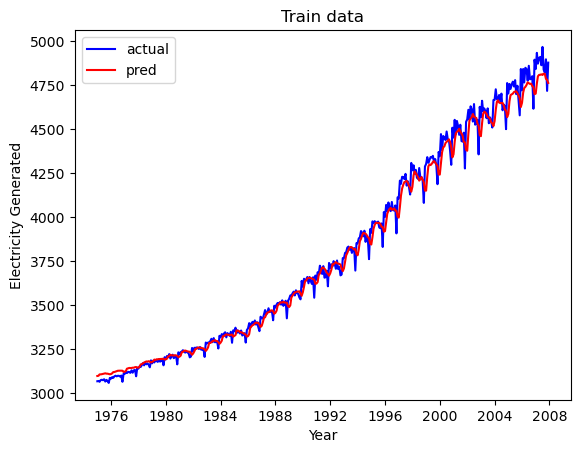

In [26]:
plt.plot(trainActual, color='blue', label='actual')
plt.plot(trainPredictdf, color='red', label='pred')

plt.title('Train data')
plt.xlabel('Year')
plt.ylabel('Electricity Generated')

plt.legend(loc='best')
plt.show()

## Forecast

In [27]:
testDates = df[404:].index

In [28]:
testActual = pd.DataFrame({'Electricity Generated': testY[0]})
testActual.index = testDates

testPredictdf = pd.DataFrame({'Electricity Generated': testPredict[:,0]})
testPredictdf.index = testDates

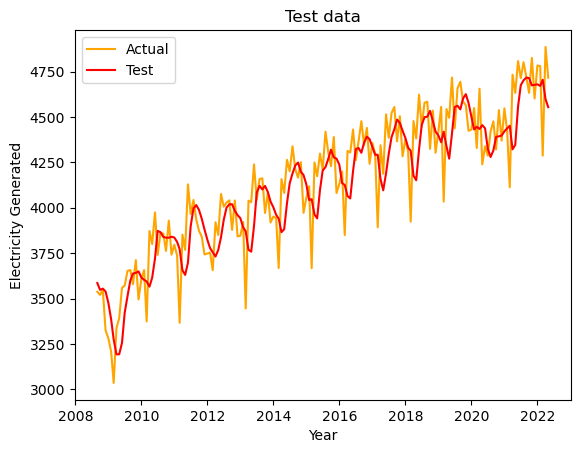

In [30]:
plt.plot(testActual, color='orange', label='Actual')
plt.plot(testPredictdf, color='red', label='Test')

plt.title('Test data')
plt.xlabel('Year')
plt.ylabel('Electricity Generated')

plt.legend(loc='best')

In [32]:
forecastDates = pd.date_range(start='2022-06', freq='MS', periods=12)

In [35]:
forecast = pd.DataFrame(forecastDates, columns=['Date'])

In [38]:
forecast.index = pd.to_datetime(forecast['Date'])
forecast = forecast.drop(columns=['Date'])